#Feature Selection and Reduction

In [1]:
import pandas as pd #imports in pandas
def make_irisdf(): #defines a function called make iris that takes no arguments
    from sklearn.datasets import load_iris #imports the load_iris module from SKLearn
    from pandas import DataFrame #imports the dataframe object from pandas
    iris = load_iris() #names iris as the load_iris() function
    df = DataFrame(iris.data, columns=iris.feature_names) #names a dataframe 'df' based on the iris data and a list of feature names
    df['target'] = iris.target #creates a target col in df based on the iris.target column
    return df #returns the dataframe

iris = make_irisdf() #creating iris based using the function defined above

In [2]:
from sklearn import feature_selection # importing feature selection module from SKLearn

In [3]:
print iris.ix[:,:4].apply(lambda x: x.var()) 
# using a one liner to print the variance for the first 4 features
print iris.ix[:,:4].head() 
# printing the head of the iris data frame for the first 4 cols
print feature_selection.VarianceThreshold(threshold=.6).fit_transform(iris.ix[:,:4])[:5] 
# using the variance threshold function from the feature selection module
# running on first four  columns and returning the columns that meet the threshold ??

sepal length (cm)    0.685694
sepal width (cm)     0.188004
petal length (cm)    3.113179
petal width (cm)     0.582414
dtype: float64
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[[ 5.1  1.4]
 [ 4.9  1.4]
 [ 4.7  1.3]
 [ 4.6  1.5]
 [ 5.   1.4]]


In [4]:
print iris.ix[:,:4].head() # printing the head of the iris data frame for the first 4 cols
ftest = feature_selection.SelectKBest(score_func=feature_selection.f_classif, k=3)
#defining an ftest object to comput f stat for the dataframe and select 3 strongest features
print pd.Series(ftest.fit(iris.ix[:,:4], iris['target']).scores_, index=iris.ix[:,:4].columns) 
#Fits the F stats (looking for highest 3 F stats)
print ftest.fit_transform(iris.ix[:,:4], iris['target'])[:5]
#returns the columns that survive the ftest

chi = feature_selection.SelectKBest(score_func=feature_selection.chi2, k=3)
#defining an ftest object to comput chi squared test for the dataframe and select 3 strongest features
print pd.Series(chi.fit(iris.ix[:,:4], iris['target']).scores_, index=iris.ix[:,:4].columns)
#Fits the chi squared to the data frame (looking for highest chi squared scores)
print chi.fit_transform(iris.ix[:,:4], iris['target'])[:5]
#returns the surviving columns

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
sepal length (cm)     119.264502
sepal width (cm)       47.364461
petal length (cm)    1179.034328
petal width (cm)      959.324406
dtype: float64
[[ 5.1  1.4  0.2]
 [ 4.9  1.4  0.2]
 [ 4.7  1.3  0.2]
 [ 4.6  1.5  0.2]
 [ 5.   1.4  0.2]]
sepal length (cm)     10.817821
sepal width (cm)       3.594499
petal length (cm)    116.169847
petal width (cm)      67.244828
dtype: float64
[[ 5.1  1.4  0.2]
 [ 4.9  1.4  0.2]
 [ 4.7  1.3  0.2]
 [ 4.6  1.5  0.2]
 [ 5.   1.4  0.2]]


In [5]:
from sklearn import linear_model as lm
#imports linear model module from SKLearn
clf = lm.LogisticRegression(penalty='L1', C=0.1)
#defines a instance of the formula using the L1 regularization, with a cost parameter of 0.1 
print iris.ix[:,:4].head() 
# printing the head of the iris data frame for the first 4 cols

print pd.DataFrame(clf.fit(iris.ix[:,:4], iris['target']).coef_, columns=iris.ix[:,:4].columns)
#printing the application of the formula on the df
print clf.fit_transform(iris.ix[:,:4], iris['target'])[:5]
#return the surviving columns

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.000000          1.124584          -1.344538                 0
1           0.000000         -0.386426           0.122771                 0
2          -0.987892          0.000000           1.277056                 0
[[ 3.5  1.4]
 [ 3.   1.4]
 [ 3.2  1.3]
 [ 3.1  1.5]
 [ 3.6  1.4]]


In [6]:
from sklearn import tree
#imports tree module from SKLearn
clf = tree.DecisionTreeClassifier(max_depth=4)
#defines a instance of the formula using a max depth of 4
print iris.ix[:,:4].head() 
#printing the head of the iris data frame for the first 4 cols
print pd.Series(clf.fit(iris.ix[:,:4], iris['target']).feature_importances_, index=iris.ix[:,:4].columns)
#applying the formula on the dataframe
print clf.fit_transform(iris.ix[:,:4], iris['target'])[:5]
#returns features that explain approx 90% of target

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
sepal length (cm)    0.000000
sepal width (cm)     0.013514
petal length (cm)    0.051408
petal width (cm)     0.935078
dtype: float64
[[ 0.2]
 [ 0.2]
 [ 0.2]
 [ 0.2]
 [ 0.2]]


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
random_data = pd.DataFrame({
        'x': range(1, 10),
        'y': range(1, 10),
        'z': range(1, 10),
    })
print np.cov(random_data.T, bias=1)

print np.var(random_data.x.T)

[[ 6.66666667  6.66666667  6.66666667]
 [ 6.66666667  6.66666667  6.66666667]
 [ 6.66666667  6.66666667  6.66666667]]
6.66666666667


In [8]:
eig, Q = np.linalg.eig(np.cov(random_data.T, bias=1))
# sort for largest eigenvalue
print eig
print Q

[  1.77635684e-15   2.00000000e+01   0.00000000e+00]
[[-0.81649658  0.57735027  0.        ]
 [ 0.40824829  0.57735027 -0.70710678]
 [ 0.40824829  0.57735027  0.70710678]]


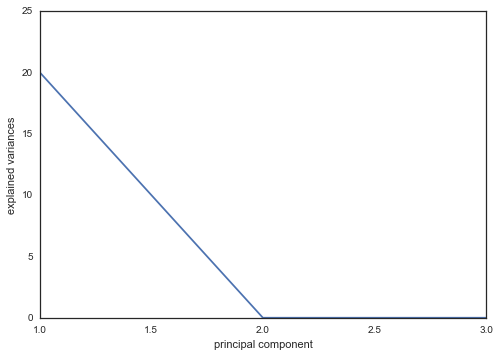

In [9]:
import seaborn as sns
from __future__ import division
eigsort = np.sort(eig)[::-1]
sns.set_style('white')
plt.figure()
plt.plot(range(1, len(eigsort) + 1), eigsort)
plt.xlabel('principal component')
plt.ylabel('explained variances')
plt.show()

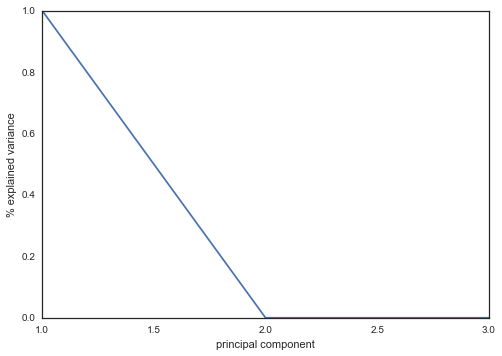

In [10]:
plt.figure()
plt.plot(range(1, len(eigsort) + 1), eigsort / max(eigsort))
plt.xlabel('principal component')
plt.ylabel('% explained variance')
plt.show()

In [11]:
# ordering eigenvalues and vectors together
ordered = sorted(zip(eig, Q.T), reverse=True)
eig = np.array([_[0] for _ in ordered])
Q = np.column_stack((_[1] for _ in ordered))

# transforming data: We take the dot multiplication of the eigenvectors by the random data
X_transformed = np.dot(Q.T, random_data.T)
print X_transformed[0]

[  1.73205081   3.46410162   5.19615242   6.92820323   8.66025404
  10.39230485  12.12435565  13.85640646  15.58845727]


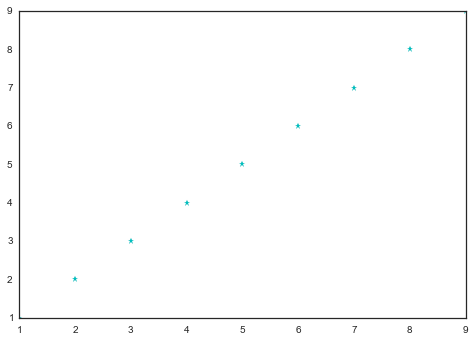

In [41]:
plt.figure()
plt.plot(random_data.y, random_data.x, '*', c='c')

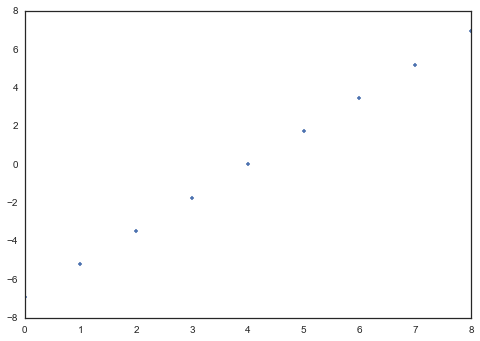

In [14]:
from sklearn import decomposition
plt.plot(decomposition.PCA().fit_transform(random_data).T[0], '.')

   x          y          z
0  1  -6.931855 -13.087256
1  2  13.309963  -4.376625
2  3  -4.072755  14.987549
3  4  14.272717  14.903665
4  5  -1.648833  -8.349714


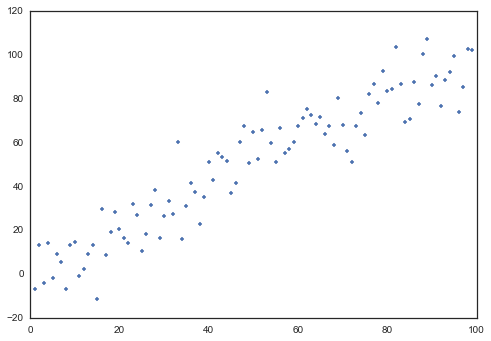

In [15]:
random_data_scattered = pd.DataFrame({
        'x': range(1, 100),
        'y': range(1, 100),
        'z': range(1, 100),
    })

random_data_scattered['y'] = random_data_scattered.y.apply(lambda y: y + np.random.normal(scale=10))
random_data_scattered['z'] = random_data_scattered.z.apply(lambda z: z + np.random.normal(scale=20))

print random_data_scattered.head()

plt.plot(random_data_scattered.x, random_data_scattered.y, '.')

##Apply PCA to the above data using the PCA() class.
1. Evaluate the eigenvalues: how many principal components do we need?
2. Which feature[s] do the principal component[s] we keep explain?
3. Try:
    * changing the scatter on y and z,
    * adding more features with more scatter
    * adding scatter to x
    * with the iris data set:
    * how many principal components do we need in this real data application?
    * how do you "name" the new principal components? what do they explain?
    * with your own data set (where would this make sense?)

In [16]:
eig, Q = np.linalg.eig(np.cov(random_data_scattered.T, bias=1))

In [18]:
ordered = sorted(zip(eig, Q.T), reverse=True)
eig = np.array([_[0] for _ in ordered])
Q = np.column_stack((_[1] for _ in ordered))

# transforming data: We take the dot multiplication of the eigenvectors by the random data
X_transformed = np.dot(Q.T, random_data_scattered.T)
print X_transformed[0]

[ -11.94594205    5.29702753    9.33098301   19.6911838    -3.87979387
   -4.12459612   -9.13923182   -2.4862656    14.04834494   16.62910558
   13.19304852   13.34490862   31.06753084    9.78826967   13.59843717
   38.53550523   29.91238655   30.42100941   33.58997308   12.63993803
   39.76001277   47.80167583    4.13634015   36.01839946   40.49429161
   47.86079771   45.39902089   44.41616659   42.00396676   46.69343785
   62.56975999   27.58931972   47.50278665   56.85237707   59.18258426
   80.30629003   51.94175352   46.44658916   74.31539517   70.80840521
   61.49447856   83.07220117   77.25375699   77.16400294   64.70163087
   78.5623807    89.26060911   93.27038518   74.13296258  113.42859911
   98.51638763   89.41578395  104.34276527   86.82729735   92.85845639
   91.64907618   72.51652628  107.36516449  113.90521015  115.26901933
   96.17487254  119.81529601  122.34947169  101.64828499  123.9236589
   79.03965663  120.17434943   77.23597616  117.11033017  117.03103517
  114.2

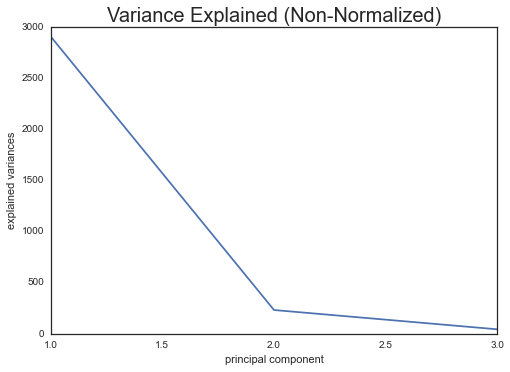

In [26]:
import seaborn as sns
from __future__ import division
eigsort = np.sort(eig)[::-1]
sns.set_style('white')
plt.figure()
plt.plot(range(1, len(eigsort) + 1), eigsort)
plt.title('Variance Explained (Non-Normalized)', fontsize=20)
plt.xlabel('principal component')
plt.ylabel('explained variances')
plt.show()

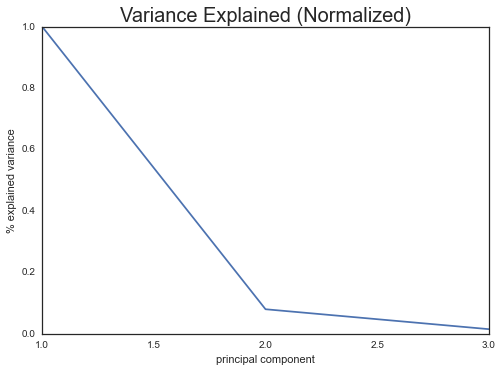

In [27]:
plt.figure()
plt.plot(range(1, len(eigsort) + 1), eigsort / max(eigsort))
plt.title('Variance Explained (Normalized)', fontsize=20)
plt.xlabel('principal component')
plt.ylabel('% explained variance')
plt.show()

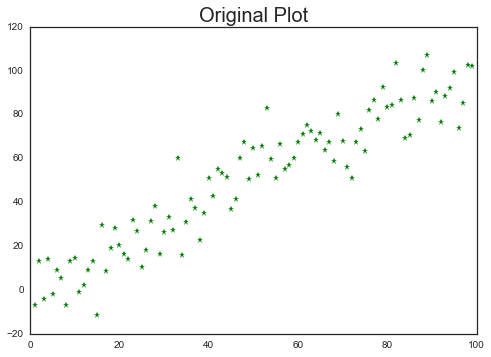

In [29]:
plt.figure()
plt.title('Original Plot', fontsize=20)
plt.plot(random_data_scattered.x, random_data_scattered.y, '*', c='g')

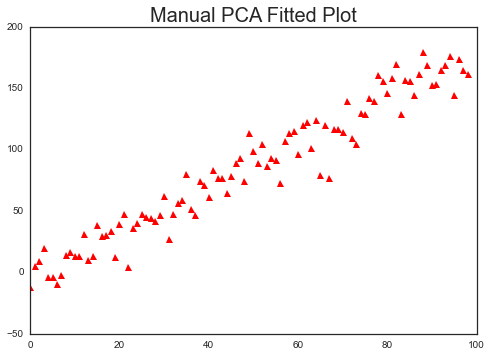

In [40]:
plt.figure()
plt.title('Manual PCA Fitted Plot', fontsize=20)
plt.plot(X_transformed[0], '^', c='r')

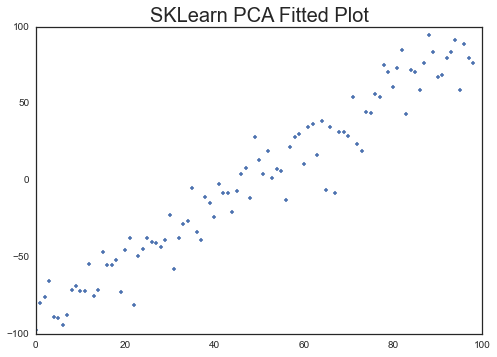

In [31]:
from sklearn import decomposition
plt.title('SKLearn PCA Fitted Plot', fontsize=20)
plt.plot(decomposition.PCA().fit_transform(random_data_scattered).T[0], '.')

   x           y          z
0  1 -545.085969  -7.684928
1  2  -21.584123  91.002697
2  3 -780.024604  22.970583
3  4 -323.194938 -38.173931
4  5   47.836482 -16.191048


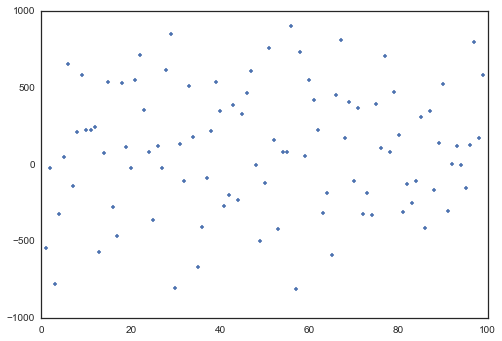

In [47]:
random_data_scattered = pd.DataFrame({
        'x': range(1, 100),
        'y': np.normal(1, 100),
        'z': range(1, 100),
    })

random_data_scattered['y'] = random_data_scattered.y.apply(lambda y: y + np.random.normal(scale=410))
random_data_scattered['z'] = random_data_scattered.z.apply(lambda z: z + np.random.normal(scale=50))

print random_data_scattered.head()

plt.plot(random_data_scattered.x, random_data_scattered.y, '.')

In [48]:
eig, Q = np.linalg.eig(np.cov(random_data_scattered.T, bias=1))

In [49]:
ordered = sorted(zip(eig, Q.T), reverse=True)
eig = np.array([_[0] for _ in ordered])
Q = np.column_stack((_[1] for _ in ordered))

# transforming data: We take the dot multiplication of the eigenvectors by the random data
X_transformed = np.dot(Q.T, random_data_scattered.T)

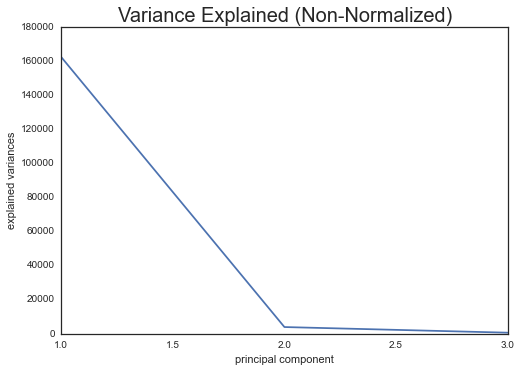

In [50]:
import seaborn as sns
from __future__ import division
eigsort = np.sort(eig)[::-1]
sns.set_style('white')
plt.figure()
plt.plot(range(1, len(eigsort) + 1), eigsort)
plt.title('Variance Explained (Non-Normalized)', fontsize=20)
plt.xlabel('principal component')
plt.ylabel('explained variances')
plt.show()